In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import openpyxl as xl
from scipy.stats import chi2_contingency, pearsonr, spearmanr

## Tehtävä 1

In [62]:
data_df = pd.read_excel("./work/viikko4/datasets/tt.xlsx")
original_data_df = data_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nro       82 non-null     int64  
 1   sukup     82 non-null     int64  
 2   ikä       82 non-null     int64  
 3   perhe     82 non-null     int64  
 4   koulutus  81 non-null     float64
 5   palveluv  80 non-null     float64
 6   palkka    82 non-null     int64  
 7   johto     82 non-null     int64  
 8   työtov    81 non-null     float64
 9   työymp    82 non-null     int64  
 10  palkkat   82 non-null     int64  
 11  työteht   82 non-null     int64  
 12  työterv   47 non-null     float64
 13  lomaosa   20 non-null     float64
 14  kuntosa   9 non-null      float64
 15  hieroja   22 non-null     float64
dtypes: float64(7), int64(9)
memory usage: 10.4 KB


array([[<Axes: title={'center': 'nro'}>,
        <Axes: title={'center': 'sukup'}>,
        <Axes: title={'center': 'ikä'}>,
        <Axes: title={'center': 'perhe'}>],
       [<Axes: title={'center': 'koulutus'}>,
        <Axes: title={'center': 'palveluv'}>,
        <Axes: title={'center': 'palkka'}>,
        <Axes: title={'center': 'johto'}>],
       [<Axes: title={'center': 'työtov'}>,
        <Axes: title={'center': 'työymp'}>,
        <Axes: title={'center': 'palkkat'}>,
        <Axes: title={'center': 'työteht'}>],
       [<Axes: title={'center': 'työterv'}>,
        <Axes: title={'center': 'lomaosa'}>,
        <Axes: title={'center': 'kuntosa'}>,
        <Axes: title={'center': 'hieroja'}>]], dtype=object)

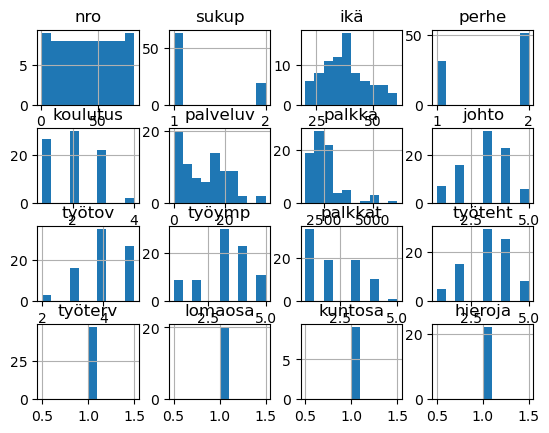

In [63]:
data_df.info()
data_desc = data_df.describe()
data_df.hist()

In [64]:
koulutus_map = {1: 'Peruskoulu', 2: '2. Aste', 3: "Korkeakoulu", 4: "Ylempi korkeakoulu"}
sukupuoli_map = {1: 'Mies', 2: 'Nainen'}
data_df['koulutus'] = data_df['koulutus'].map(koulutus_map)
data_df['sukup'] = data_df['sukup'].map(sukupuoli_map)

In [65]:
frekvenssi_df = pd.crosstab(index=data_df['koulutus'], columns='Lukumäärä')
frekvenssi_df['%'] = (frekvenssi_df['Lukumäärä'] / frekvenssi_df['Lukumäärä'].sum()) * 100

frekvenssi_df

col_0,Lukumäärä,%
koulutus,,
2. Aste,30,37.037037
Korkeakoulu,22,27.160494
Peruskoulu,27,33.333333
Ylempi korkeakoulu,2,2.469136


<Axes: xlabel='Lukumäärä', ylabel='koulutus'>

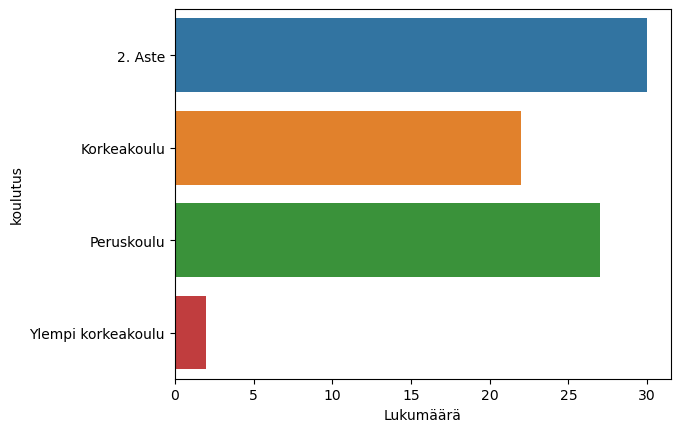

In [66]:
sb.barplot(data=frekvenssi_df, x='Lukumäärä', y=frekvenssi_df.index)

## Tehtävä 2

In [67]:
frekvenssi_df = pd.crosstab(index=data_df['koulutus'], columns=data_df['sukup'])
frekvenssi_df

sukup,Mies,Nainen
koulutus,,
2. Aste,23,7
Korkeakoulu,15,7
Peruskoulu,22,5
Ylempi korkeakoulu,2,0


## Tehtävä 3

In [68]:
res = chi2_contingency(frekvenssi_df)
res.pvalue

0.6070173075042058

<Axes: xlabel='Lukumäärä', ylabel='Koulutus'>

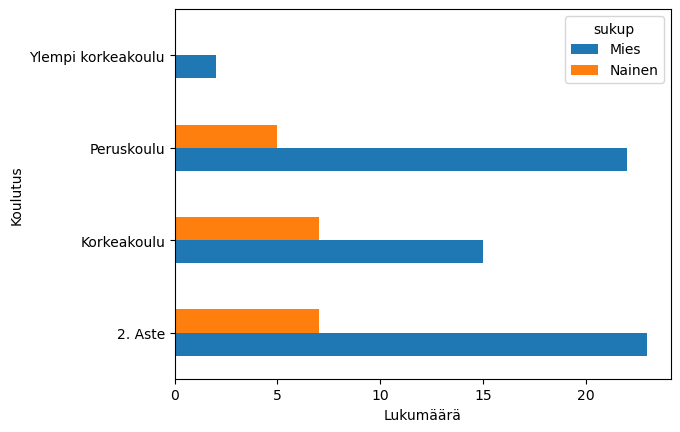

In [69]:
frekvenssi_df.plot.barh(ylabel="Koulutus", xlabel="Lukumäärä")

## Tehtävä 4

<Axes: >

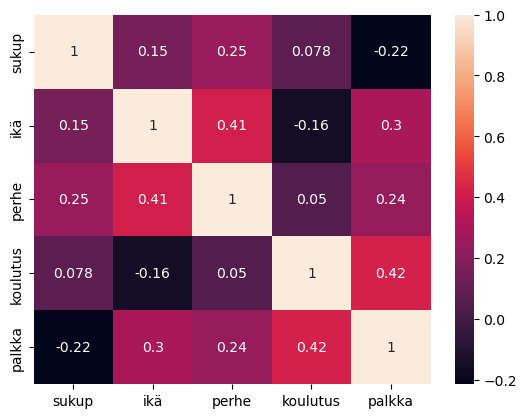

In [70]:
df_corr = original_data_df[['sukup', 'ikä', 'perhe', 'koulutus', 'palkka']]

corr = df_corr.corr()

sb.heatmap(corr, annot=True)

In [76]:
pearsonr(df_corr['ikä'], df_corr['palkka'])

PearsonRResult(statistic=0.2968719048961778, pvalue=0.0067615145801082485)

In [77]:
spearmanr(df_corr['ikä'], df_corr['palkka'])

SignificanceResult(statistic=0.3095587335779997, pvalue=0.004654685549528727)

<Axes: xlabel='ikä', ylabel='palkka'>

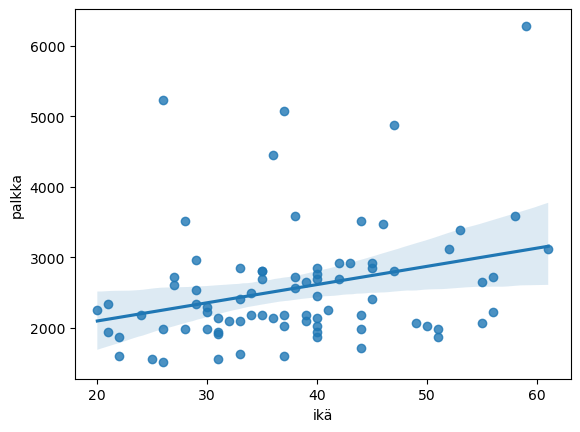

In [78]:
sb.regplot(x=df_corr['ikä'], y=df_corr['palkka'])

Tulosten perusteella iän ja palkan välillä on tilastollisesti merkittävä mutta heikko positiivinen korrelaatio.